In [2]:
import pandas as pd

In [3]:
#loading the data
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\data sets, text files ,etc for ML\\iris.csv')

In [4]:
#visualizing out dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#droping the unnecessary Id column
df.drop(['Id'], axis = 1, inplace= True)

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#separating the target values from dataframe because we would not perform
#on target values i.e. species
x = df.iloc[:, [0,1,2,3]].values
y = df.iloc[:, [4]].values

In [8]:
#visualizing some data
x[:7]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3]])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
ss = StandardScaler()

In [11]:
#standarizing the datapoints
sc_dt = ss.fit_transform(x)

In [12]:
#visualizing our standarized data
sc_dt

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [13]:
from sklearn.decomposition import PCA

In [14]:
#creating pca object with no. of final dimensions to be 2 and fitting
#our data
pca = PCA(n_components=2)
pca_dt = pca.fit_transform(sc_dt)

In [15]:
#After performing the PCA e input the data in dataframe
pca_df = pd.DataFrame(data = pca_dt, columns = ['Principal Component 1',
                                               'Principal Component 2'])

In [16]:
pca_df.head()

,Principal Component 1,Principal Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [17]:
#finally we concatinate our target values with our dataframe
finaldf = pd.concat([pca_df, df[['Species']]], axis = 1)

In [18]:
finaldf.head()

,Principal Component 1,Principal Component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


# Visualizing the datapoints on PC1 & PC2

In [19]:
import matplotlib.pyplot as plt

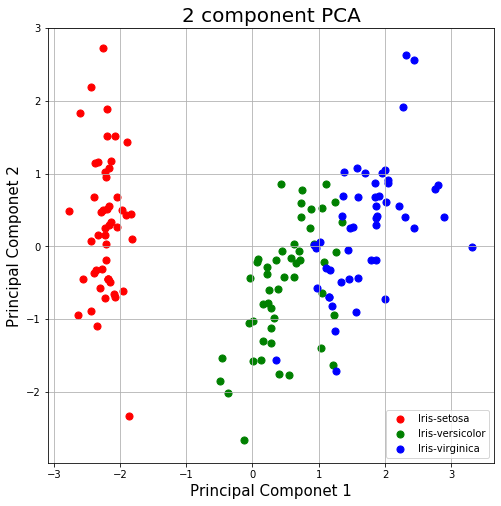

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Componet 1', fontsize = 15)
ax.set_ylabel('Principal Componet 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']

#know more

for target,color in zip(targets, colors):#know more
    indicesToKeep = finaldf['Species'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Principal Component 1'],
              finaldf.loc[indicesToKeep, 'Principal Component 2'],
              c= color, s= 50)
    
ax.legend(targets)
ax.grid()

In [21]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

This means that together the first two principal components contain 95.80% of the information (or variation).
PCA 1: 72% of the variance
PCA 2: 23.03% of the variance